In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
# import pymc3 as pm
import seaborn as sns
import wtascripts.wta_helpers as wta_helpers

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# %config InlineBackend.figure_format = 'png'
# mpl.rcParams['figure.dpi']= 300

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [14]:
# Load then clean dataset
df = wta_helpers.load_raw_df()
df = wta_helpers.clean_raw_df(df)

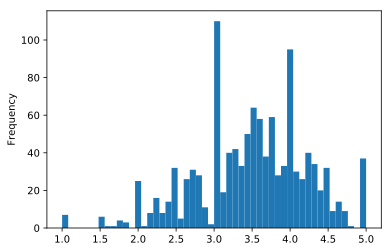

In [15]:
df.rating.plot.hist(50)

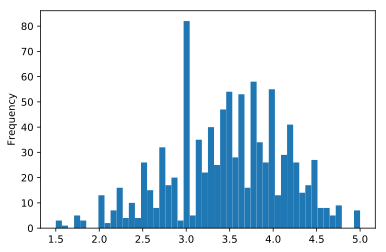

In [16]:
df[df.votes > 3].rating.plot.hist(50)

In [17]:
df[df.votes > 3].describe()

,votes,rating,length,gain,hpoint,lat,long,countreports,Wildflowers/Meadows,Mountain views,Dogs allowed on leash,Established campsites,Waterfalls,Good for kids,Fall foliage,Ridges/passes,Wildlife,Old growth,Summits,Lakes,Rivers,Coast
count,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000,973.000
mean,14.787,3.479,8.359,1719.831,3995.255,47.459,-121.605,120.010,0.531,0.659,0.495,0.261,0.177,0.343,0.229,0.288,0.388,0.319,0.219,0.354,0.296,0.042
std,25.423,0.663,7.513,1603.641,2165.295,0.791,1.145,199.716,0.499,0.474,0.500,0.439,0.382,0.475,0.421,0.453,0.488,0.466,0.414,0.478,0.457,0.201
min,4.000,1.500,0.250,10.000,10.000,45.577,-124.683,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5.000,3.000,4.000,500.000,2028.000,46.911,-122.070,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,7.000,3.500,7.000,1400.000,4400.000,47.516,-121.607,53.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,14.000,4.000,10.400,2550.000,5730.000,47.977,-121.093,126.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000
max,294.000,5.000,117.000,26351.000,12276.000,48.995,-117.078,1697.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [73]:
df[df['lengthtype'] == "one-way"]

,name,region,subregion,votes,rating,length,lengthtype,gain,hpoint,fee,lat,long,trailhead1,countreports,Wildflowers/Meadows,Mountain views,Dogs allowed on leash,Established campsites,Waterfalls,Good for kids,Fall foliage,Ridges/passes,Wildlife,Old growth,Summits,Lakes,Rivers,Coast
5,The Enchantments,Central Cascades,Leavenworth Area,96,4.650,18.000,one-way,4500.000,7800.000,Northwest Forest Pass,47.528,-120.821,Enchantment Lakes (#1553),580,1,1,0,1,1,0,1,1,1,0,1,1,0,0
25,Coyote Trail,South Cascades,White Pass/Cowlitz River Valley,1,4.000,6.800,one-way,1480.000,6600.000,Northwest Forest Pass,46.609,-121.627,Coyote Trail (#79),19,1,1,1,0,0,0,0,0,0,0,0,0,0,0
101,South Coast Wilderness Trail - Toleak Point,Olympic Peninsula,Pacific Coast,15,4.200,17.000,one-way,250.000,250.000,None,47.890,-124.603,Olympic National Park,85,0,0,0,1,1,0,0,0,1,0,0,0,1,1
121,Clear Lost Trail to Lost Lake Lookout,South Cascades,White Pass/Cowlitz River Valley,6,2.830,14.000,one-way,3897.000,6316.000,None,46.626,-121.446,Clear Lost (#76),14,0,1,1,0,0,0,0,0,1,0,0,1,0,0
152,Cedar River Trail,Puget Sound and Islands,Seattle-Tacoma Area,8,3.620,17.400,one-way,820.000,600.000,None,47.500,-122.215,King County Parks,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0
156,Redmond Powerline Trail,Puget Sound and Islands,Seattle-Tacoma Area,1,2.000,6.700,one-way,548.000,574.000,None,47.698,-122.082,"Puget Sound Energy, King County Parks",1,1,1,1,0,0,1,1,0,0,0,0,0,1,0
158,520 Trail,Puget Sound and Islands,Seattle-Tacoma Area,1,3.000,4.900,one-way,164.000,164.000,None,47.645,-122.302,Washington Department of Transportation,6,0,1,1,0,0,0,0,0,1,0,0,1,0,0
220,Pacific Crest Trail (PCT) Section K - Stevens ...,Central Cascades,Stevens Pass - East,6,4.000,117.000,one-way,26351.000,6600.000,Northwest Forest Pass,47.746,-121.089,Pacific Crest Trail Section K - Stevens Pass t...,125,1,1,0,1,0,0,0,1,1,0,1,0,1,0
359,Harts Pass to Rainy Pass,North Cascades,North Cascades Highway - Hwy 20,1,5.000,30.600,one-way,3800.000,6900.000,Northwest Forest Pass,48.702,-120.673,Okanogan-Wenatchee National Forest,3,1,1,0,1,0,0,0,1,1,1,0,1,1,0
429,Boundary Trail - Pasayten,North Cascades,Pasayten,4,3.250,80.000,one-way,9000.000,7800.000,Northwest Forest Pass,48.885,-119.867,Boundary Trail (#533),60,0,1,1,0,0,0,0,1,0,0,1,1,1,0


In [20]:
df[df.votes > 3].corr()

,votes,rating,length,gain,hpoint,lat,long,countreports,Wildflowers/Meadows,Mountain views,Dogs allowed on leash,Established campsites,Waterfalls,Good for kids,Fall foliage,Ridges/passes,Wildlife,Old growth,Summits,Lakes,Rivers,Coast
votes,1.000,0.307,-0.066,0.019,-0.039,0.090,-0.042,0.913,0.043,0.126,0.167,0.025,0.231,0.114,0.022,-0.006,-0.053,0.095,0.097,0.094,0.005,0.008
rating,0.307,1.000,0.021,0.080,0.099,0.099,-0.065,0.358,0.081,0.195,0.079,0.074,0.155,0.069,0.070,0.109,-0.054,0.013,0.179,0.085,-0.021,0.064
length,-0.066,0.021,1.000,0.699,0.349,0.142,0.110,-0.036,0.122,0.203,-0.125,0.283,0.058,-0.320,0.007,0.271,0.043,0.011,0.083,0.102,0.146,-0.095
gain,0.019,0.080,0.699,1.000,0.583,0.134,0.094,0.087,0.153,0.323,-0.114,0.153,0.028,-0.469,0.007,0.358,-0.078,-0.033,0.318,0.034,-0.011,-0.185
hpoint,-0.039,0.099,0.349,0.583,1.000,0.020,0.309,0.026,0.277,0.471,-0.203,0.114,-0.065,-0.486,-0.011,0.471,-0.154,-0.180,0.332,0.115,-0.210,-0.340
lat,0.090,0.099,0.142,0.134,0.020,1.000,0.086,0.114,0.014,0.087,0.125,0.114,-0.004,0.062,0.156,0.054,-0.043,0.061,0.017,0.049,-0.010,0.098
long,-0.042,-0.065,0.110,0.094,0.309,0.086,1.000,-0.036,0.214,0.080,0.046,0.001,-0.050,-0.143,0.039,0.104,0.048,-0.171,0.067,0.042,-0.059,-0.279
countreports,0.913,0.358,-0.036,0.087,0.026,0.114,-0.036,1.000,0.066,0.181,0.193,0.069,0.251,0.073,0.058,0.023,-0.083,0.112,0.125,0.104,-0.002,-0.037
Wildflowers/Meadows,0.043,0.081,0.122,0.153,0.277,0.014,0.214,0.066,1.000,0.189,0.004,0.066,0.009,-0.145,0.140,0.228,0.182,-0.052,0.094,0.022,-0.099,-0.152
Mountain views,0.126,0.195,0.203,0.323,0.471,0.087,0.080,0.181,0.189,1.000,0.006,0.087,-0.047,-0.251,0.047,0.343,-0.071,-0.052,0.297,0.070,-0.151,-0.097


In [21]:
# votes, count of tripreports, mountains, waterfall, summits, then hpoint, then ridges/passes

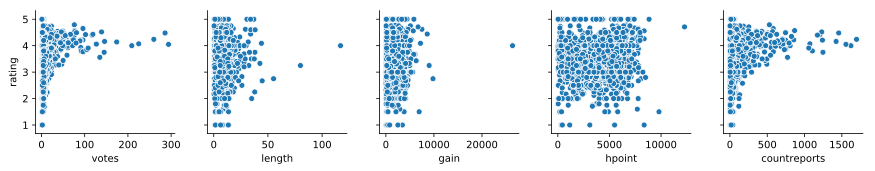

In [22]:
sns.pairplot(df,
             x_vars=['votes','length','gain','hpoint','countreports'],
             y_vars='rating')

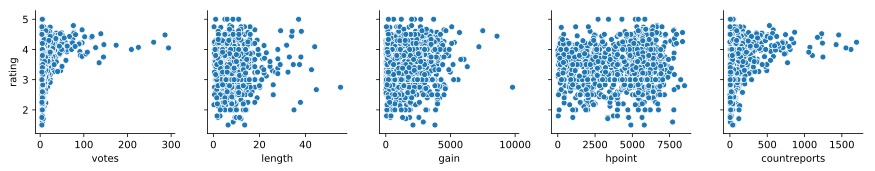

In [23]:
sns.pairplot(df[(df.votes > 3) & (df.length < 60) & (df.hpoint < 9000)],
             x_vars=['votes','length','gain','hpoint','countreports'],
             y_vars='rating')

In [62]:
np.set_printoptions(suppress=True)

In [ ]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

dataset = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
print(dataset.head(5))

# Define which columns should be encoded vs scaled
columns_to_encode = ['rank']
columns_to_scale  = ['gre', 'gpa']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(dataset[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(dataset[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

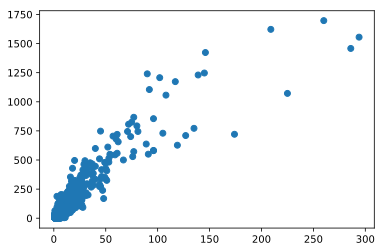

In [112]:
# votes and count reports are highly correlated
plt.scatter(df['votes'], df['countreports']);

In [114]:
cont_cols= ['votes', 'countreports', 'length', 'gain', 'hpoint', 'Wildflowers/Meadows', 'Ridges/passes',
            'Wildlife','Waterfalls','Old growth','Summits','Good for kids','Dogs allowed on leash',
            'Fall foliage','Lakes','Rivers','Coast','Mountain views','Established campsites',]

In [99]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

cont_cols = ['votes', 'countreports', 'length', 'gain', 'hpoint']
oh_cols = df[onehot_feats]

#Standardize the non one-hot encoding variables into XS
s = StandardScaler()
XS = s.fit_transform(X)
#print(oh_cols)
# combine with the one hot encoding variables

X = np.concatenate([XS, oh_cols], axis=1)
y = df['rating']

In [105]:
newlist = cont_cols + onehot_feats
newlist

['votes',
 'countreports',
 'length',
 'gain',
 'hpoint',
 'Wildflowers/Meadows',
 'Ridges/passes',
 'Wildlife',
 'Waterfalls',
 'Old growth',
 'Summits',
 'Good for kids',
 'Dogs allowed on leash',
 'Fall foliage',
 'Lakes',
 'Rivers',
 'Coast',
 'Mountain views',
 'Established campsites']

In [100]:
X_train, X_test, y_train, ytest = train_test_split(X, y)

reg = LinearRegression()

reg.fit(X_train, y_train)

print("intercept:",reg.intercept_)
print("coefficients,",reg.coef_)

y_pred = reg.predict(X_test)

print("RMSE:", np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("MSE:", metrics.mean_squared_error(ytest, y_pred))
print("Score:", )

intercept: 3.47782573664819
coefficients, [-0.00696288  0.17547668 -0.01816087  0.03342077  0.05011409  0.01781372
  0.01871691 -0.05579309  0.0551661  -0.01811788  0.09607111  0.0605057
 -0.00080163  0.0214569   0.03750625  0.00926903  0.08185126  0.02037941
  0.01656873  0.00889553  0.0083305  -0.02727188  0.02065876 -0.00840184
  0.04034918  0.02905803 -0.00040064  0.00924212  0.01768829  0.00422979
  0.0170071   0.00977171  0.00717031]
RMSE: 0.747839486147047
MSE: 0.5592638970406794


In [109]:
hold = sorted(zip(df[newlist], reg.coef_), key=lambda x: x[1], reverse=True)
print(hold)

[('countreports', 0.17547668092397029), ('Summits', 0.09607111176365152), ('Coast', 0.08185125532592834), ('Good for kids', 0.06050570385629965), ('Waterfalls', 0.05516610235502332), ('hpoint', 0.050114087911174894), ('Lakes', 0.0375062532924021), ('gain', 0.03342076858008302), ('Fall foliage', 0.021456896512394144), ('Mountain views', 0.020379410211254112), ('Ridges/passes', 0.01871690959431038), ('Wildflowers/Meadows', 0.01781372261114807), ('Established campsites', 0.016568734842516638), ('Rivers', 0.009269028876322265), ('Dogs allowed on leash', -0.0008016341320307913), ('votes', -0.0069628822000521624), ('Old growth', -0.01811787606799088), ('length', -0.018160872318307868), ('Wildlife', -0.05579309391890981)]


In [55]:
X2 = df[onehot_feats]

In [110]:
df.head()

,name,region,subregion,votes,rating,length,lengthtype,gain,hpoint,fee,lat,long,trailhead1,countreports,Wildflowers/Meadows,Mountain views,Dogs allowed on leash,Established campsites,Waterfalls,Good for kids,Fall foliage,Ridges/passes,Wildlife,Old growth,Summits,Lakes,Rivers,Coast
0,Heliotrope Ridge,North Cascades,Mount Baker Area,37,4.380,5.500,roundtrip,1400.000,5100.000,Northwest Forest Pass,48.802,-121.896,Heliotrope Ridge (#677),318,1,1,1,1,1,1,1,0,0,0,0,0,0,0
1,Bear Creek Mountain,South Cascades,Goat Rocks,9,3.220,7.000,roundtrip,1237.000,7337.000,None,46.538,-121.316,Bear Creek Mountain (#1130),40,1,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Skyline Trail Loop,Mount Rainier Area,SW - Longmire/Paradise,49,4.550,5.500,roundtrip,1450.000,6800.000,National Park Pass,46.786,-121.735,"Mount Rainier National Park, Longmire Wilderne...",353,1,1,0,0,1,0,0,0,1,0,0,0,1,0
3,Tronsen Ridge,Central Cascades,Blewett Pass,10,4.000,8.000,roundtrip,1000.000,5800.000,Northwest Forest Pass,47.323,-120.526,Tronsen Ridge (#1204),120,1,1,0,0,0,0,1,1,0,0,0,0,0,0
5,The Enchantments,Central Cascades,Leavenworth Area,96,4.650,18.000,one-way,4500.000,7800.000,Northwest Forest Pass,47.528,-120.821,Enchantment Lakes (#1553),580,1,1,0,1,1,0,1,1,1,0,1,1,0,0


In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# X2 is a numpy array with your features
# y is the label array
enc = OneHotEncoder(sparse=False, categories='auto')
X2_transform = enc.fit_transform(X2)

# apply your linear regression as you want
model = LinearRegression(fit_intercept=False)
model.fit(X2_transform, y)
print('Coefs', model.coef_)
print("Mean squared error: %.2f" % np.mean((model.predict(X2_transform) - y) ** 2))

Coefs [-3.78197121e+12 -3.78197121e+12 -1.73552592e+12 -1.73552592e+12
  6.82584014e+11  6.82584014e+11 -1.97770536e+12 -1.97770536e+12
 -3.13123236e+11 -3.13123236e+11 -2.20642562e+11 -2.20642562e+11
 -1.69052405e+11 -1.69052405e+11 -1.24486499e+12 -1.24486499e+12
  9.16246472e+11  9.16246472e+11  1.46473950e+12  1.46473950e+12
  6.99487068e+11  6.99487068e+11  3.87435001e+12  3.87435001e+12
  9.92755739e+11  9.92755739e+11  8.12722887e+11  8.12722887e+11]
Mean squared error: 0.49


In [75]:
X2_transform.

array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [52]:
feats = [
    'name',
    'region',
    'subregion',
    'votes',
    'rating',
    'length',
    'lengthtype',
    'gain',
    'hpoint',
    'fee',
    'lat',
    'long',
    'countreports',
          ]

onehot_feats = [
    'Wildflowers/Meadows',
    'Ridges/passes',
    'Wildlife',
    'Waterfalls',
    'Old growth',
    'Summits',
    'Good for kids',
    'Dogs allowed on leash',
    'Fall foliage',
    'Lakes',
    'Rivers',
    'Coast',
    'Mountain views',
    'Established campsites',
]

In [373]:
d = {i: len(df[i].unique()) for i in df.columns}
d

{'name': 1137,
 'region': 11,
 'subregion': 51,
 'votes': 85,
 'rating': 178,
 'length': 199,
 'lengthtype': 3,
 'gain': 321,
 'hpoint': 563,
 'fee': 12,
 'lat': 1001,
 'long': 1012,
 'trailhead1': 870,
 'countreports': 305,
 'Wildflowers/Meadows': 2,
 'Mountain views': 2,
 'Dogs allowed on leash': 2,
 'Established campsites': 2,
 'Waterfalls': 2,
 'Good for kids': 2,
 'Fall foliage': 2,
 'Ridges/passes': 2,
 'Wildlife': 2,
 'Old growth': 2,
 'Summits': 2,
 'Lakes': 2,
 'Rivers': 2,
 'Coast': 2}